# Exploratory Data Analysis

This notebook contains exploratory data analysis of Global Terrorism dataset from Kaggle


## Importing the data and required packages

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams['figure.figsize'] = (10, 7)

In [2]:
# Importing the data 
data = pd.read_csv('../data/globalterrorism.csv', encoding='ISO-8859-1', low_memory=False)
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
print(f"There are {len(data.columns)} columns in the dataset.")
print(f"There are {len(data)} samples in the original dataset")

There are 135 columns in the dataset.
There are 181691 samples in the original dataset


There are too many columns in the dataset. So I selected some important columns to perform data analysis on them.

In [4]:
imp_cols = ["iyear", "imonth", "iday", "extended", "country_txt", "region_txt", "vicinity", "latitude", "longitude", "multiple", "success", "suicide", "individual", "ishostkid", "nkill", "nwound"]
print(f"Number of important columns: {len(imp_cols)}")

Number of important columns: 16


**Shape of the original dataset**

In [5]:
data.shape

(181691, 135)

### Data Reduction

In [6]:
# Transform the original dataframe
terror_data = data[imp_cols]
terror_data.columns

Index(['iyear', 'imonth', 'iday', 'extended', 'country_txt', 'region_txt',
       'vicinity', 'latitude', 'longitude', 'multiple', 'success', 'suicide',
       'individual', 'ishostkid', 'nkill', 'nwound'],
      dtype='object')

In [7]:
terror_data.head()

,iyear,imonth,iday,extended,country_txt,region_txt,vicinity,latitude,longitude,multiple,success,suicide,individual,ishostkid,nkill,nwound
0,1970,7,2,0,Dominican Republic,Central America & Caribbean,0,18.456792,-69.951164,0.0,1,0,0,0.0,1.0,0.0
1,1970,0,0,0,Mexico,North America,0,19.371887,-99.086624,0.0,1,0,0,1.0,0.0,0.0
2,1970,1,0,0,Philippines,Southeast Asia,0,15.478598,120.599741,0.0,1,0,0,0.0,1.0,0.0
3,1970,1,0,0,Greece,Western Europe,0,37.997490,23.762728,0.0,1,0,0,0.0,NaN,NaN
4,1970,1,0,0,Japan,East Asia,0,33.580412,130.396361,0.0,1,0,0,0.0,NaN,NaN


In [8]:
print(f"There are {len(terror_data.columns)} in the reduced dataframe")
print(f"There are {len(terror_data)} in the reduced dataframe")

There are 16 in the reduced dataframe
There are 181691 in the reduced dataframe


**Information statistics of the dataset**

In [9]:
terror_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        181691 non-null  int64  
 1   imonth       181691 non-null  int64  
 2   iday         181691 non-null  int64  
 3   extended     181691 non-null  int64  
 4   country_txt  181691 non-null  object 
 5   region_txt   181691 non-null  object 
 6   vicinity     181691 non-null  int64  
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   multiple     181690 non-null  float64
 10  success      181691 non-null  int64  
 11  suicide      181691 non-null  int64  
 12  individual   181691 non-null  int64  
 13  ishostkid    181513 non-null  float64
 14  nkill        171378 non-null  float64
 15  nwound       165380 non-null  float64
dtypes: float64(6), int64(8), object(2)
memory usage: 22.2+ MB


### Dataset Information

**iyear:** Year in which the incident has occurred\
**imonth:** month in which the incident has occurred\
**iday:** day in which the incident has occurred\
**extended:** Duration of the incident extended more than 24 hours\
**country_txt:** Identifies the country or location in which the event has occurred\
**region_txt:** Identifies the region in which the event has occurred\
**vicinity:** Whether the attack occurred in the vicinity of a city\
**latitude:** Records the latitude of the incident location\
**longitude:** Records the longitude of the incident location\
**multiple:** Records whether the attack is a part of multiple attacks.\
**success:** Whether the attack was successful or not.\
**suicide:** Whether the attacker committed suicide or not.\
**individual:** Whether the attacker is planned by a group or individual\
**ishostkid:** Whether a hostage or kidnapped situation occured in the attack\
**nkill:** No. of fatalities 
**nwound:** No of wounded


### **Data Checks**

* Checking for missing values
* Checking for duplicate values
* Check datatypes
* Check for unique values in every column
* Check statistics of the given data


**Checking for missing values**

In [10]:
terror_data.isnull().sum()

iyear              0
imonth             0
iday               0
extended           0
country_txt        0
region_txt         0
vicinity           0
latitude        4556
longitude       4557
multiple           1
success            0
suicide            0
individual         0
ishostkid        178
nkill          10313
nwound         16311
dtype: int64

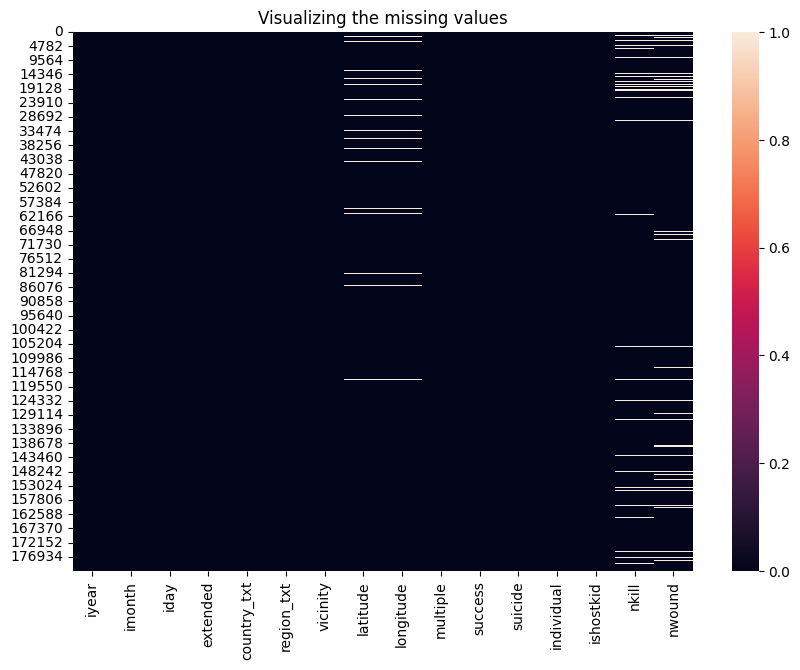

In [11]:
sns.heatmap(terror_data.isna())
plt.title("Visualizing the missing values")
plt.show()

There are missing values present in our dataset

**Check for duplicated values**

In [12]:
terror_data.duplicated().sum()

17776

In [13]:
terror_data = terror_data.drop_duplicates()

In [14]:
terror_data.duplicated().sum()

0

Check for missing values as some duplicates values may also contain missing values

In [15]:
na_values = terror_data.isna().sum()
na_values

iyear              0
imonth             0
iday               0
extended           0
country_txt        0
region_txt         0
vicinity           0
latitude        3847
longitude       3848
multiple           1
success            0
suicide            0
individual         0
ishostkid        150
nkill           8600
nwound         14179
dtype: int64

**Drop the missing values**

In [16]:
# fill the nwound column
terror_data["nwound"].fillna(0, inplace=True)

# fill the nkill column
terror_data["nkill"].fillna(0, inplace=True)

# fill the ishostkid column
terror_data["ishostkid"].fillna(-9, inplace=True)

Assuming that nobody got killed or wounded when there are missing values in `nwound` and `nkill` column

In [17]:
# Let's drop the remaining missing values
terror_data.dropna(inplace=True)

**Checking datatypes**

In [18]:
terror_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 160066 entries, 0 to 181690
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   iyear        160066 non-null  int64  
 1   imonth       160066 non-null  int64  
 2   iday         160066 non-null  int64  
 3   extended     160066 non-null  int64  
 4   country_txt  160066 non-null  object 
 5   region_txt   160066 non-null  object 
 6   vicinity     160066 non-null  int64  
 7   latitude     160066 non-null  float64
 8   longitude    160066 non-null  float64
 9   multiple     160066 non-null  float64
 10  success      160066 non-null  int64  
 11  suicide      160066 non-null  int64  
 12  individual   160066 non-null  int64  
 13  ishostkid    160066 non-null  float64
 14  nkill        160066 non-null  float64
 15  nwound       160066 non-null  float64
dtypes: float64(6), int64(8), object(2)
memory usage: 20.8+ MB


**Check for unique values  in every column**

In [19]:
cat_df = terror_data.select_dtypes(exclude=['int', 'float'])
cat_df.nunique()

country_txt    204
region_txt      12
dtype: int64

**Check the descriptive statistics of the dataset**


In [20]:
terror_data.describe()

,iyear,imonth,iday,extended,vicinity,latitude,longitude,multiple,success,suicide,individual,ishostkid,nkill,nwound
count,160066.000000,160066.000000,160066.000000,160066.000000,160066.000000,160066.000000,1.600660e+05,160066.000000,160066.000000,160066.000000,160066.000000,160066.000000,160066.000000,160066.000000
mean,2003.577637,6.471168,15.535123,0.047812,0.072389,23.999895,-5.078848e+02,0.093599,0.885678,0.040358,0.003267,0.055065,2.413061,3.152831
std,13.007161,3.391049,8.811339,0.213368,0.289857,17.991270,2.154204e+05,0.291271,0.318202,0.196799,0.057068,0.534206,11.697494,36.485584
min,1970.000000,0.000000,0.000000,0.000000,-9.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000
25%,1992.000000,4.000000,8.000000,0.000000,0.000000,11.968390,8.644740e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2010.000000,6.000000,15.000000,0.000000,0.000000,31.560363,4.376667e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2014.000000,9.000000,23.000000,0.000000,0.000000,34.621521,6.914701e+01,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,74.633553,1.793667e+02,1.000000,1.000000,1.000000,1.000000,1.000000,1570.000000,8191.000000


**Insights**
* This dataset contains records from year 1970 to 2017
* On average, 2 members are killed every attack.
* On average, 8 out of 10 attacks are succeeded.
* There is 40% chance that the attacker will attempt suicide.
* There is 10% chance that there will be another attack following the first attack
* There is a probability of 0.06 that there will be a hostage or kidnap situation in a terrorist attack.
* There are 160000 attacks from 1970 to 2017

From the above descriptive statistics we can see that month and day are having the value 0 which is not possible, so let's remove the rows

In [21]:
# Removing the samples where monthe is 0
terror_data = terror_data[(terror_data["imonth"] != 0)]
terror_data = terror_data[(terror_data["iday"] != 0)]

## Data Exploration

**Check for number of numerical and categorical columns in the dataset**

In [22]:
cat_features = terror_data.select_dtypes(include="object").columns
num_features = terror_data.select_dtypes(exclude="object").columns

print(f"Number of numerical columns: {len(num_features)}")
print(f"Number of categorical columns: {len(cat_features)}")

Number of numerical columns: 14
Number of categorical columns: 2


**Checking for categories in categorical columns**

In [23]:
cat_columns = list(cat_df.columns)

print("Categories in 'country_txt' :\n")
print(terror_data["country_txt"].unique())

print("Categories in 'region_txt': \n")
print(terror_data["region_txt"].unique())

Categories in 'country_txt' :

['Dominican Republic' 'United States' 'Uruguay' 'Italy'
 'East Germany (GDR)' 'Guatemala' 'Philippines' 'Venezuela'
 'West Germany (FRG)' 'Switzerland' 'Jordan' 'Brazil' 'Egypt' 'Argentina'
 'Lebanon' 'Japan' 'Ireland' 'Turkey' 'Paraguay' 'Iran' 'United Kingdom'
 'Colombia' 'Greece' 'Nicaragua' 'Spain' 'Belgium' 'Mexico' 'Netherlands'
 'Canada' 'Australia' 'Pakistan' 'Ethiopia' 'Sweden' 'Costa Rica'
 'Bolivia' 'South Yemen' 'Israel' 'Poland' 'Taiwan' 'Panama'
 'West Bank and Gaza Strip' 'Austria' 'India' 'France' 'South Vietnam'
 'Cambodia' 'Brunei' 'Zaire' "People's Republic of the Congo" 'Portugal'
 'Algeria' 'El Salvador' 'Thailand' 'Haiti' 'Sudan' 'Morocco' 'Cyprus'
 'Afghanistan' 'Peru' 'Chile' 'Honduras' 'Yugoslavia' 'Ecuador'
 'New Zealand' 'Zambia' 'Malaysia' 'Singapore' 'Botswana' 'Kuwait'
 'Jamaica' 'Chad' 'North Yemen' 'Syria' 'South Korea'
 'United Arab Emirates' 'South Africa' 'Kenya' 'Iraq' 'Somalia'
 'Sri Lanka' 'Namibia' 'Bahamas' 'Nigeria

## Data Visualization

### Univariate Analysis

#### `iyear` column

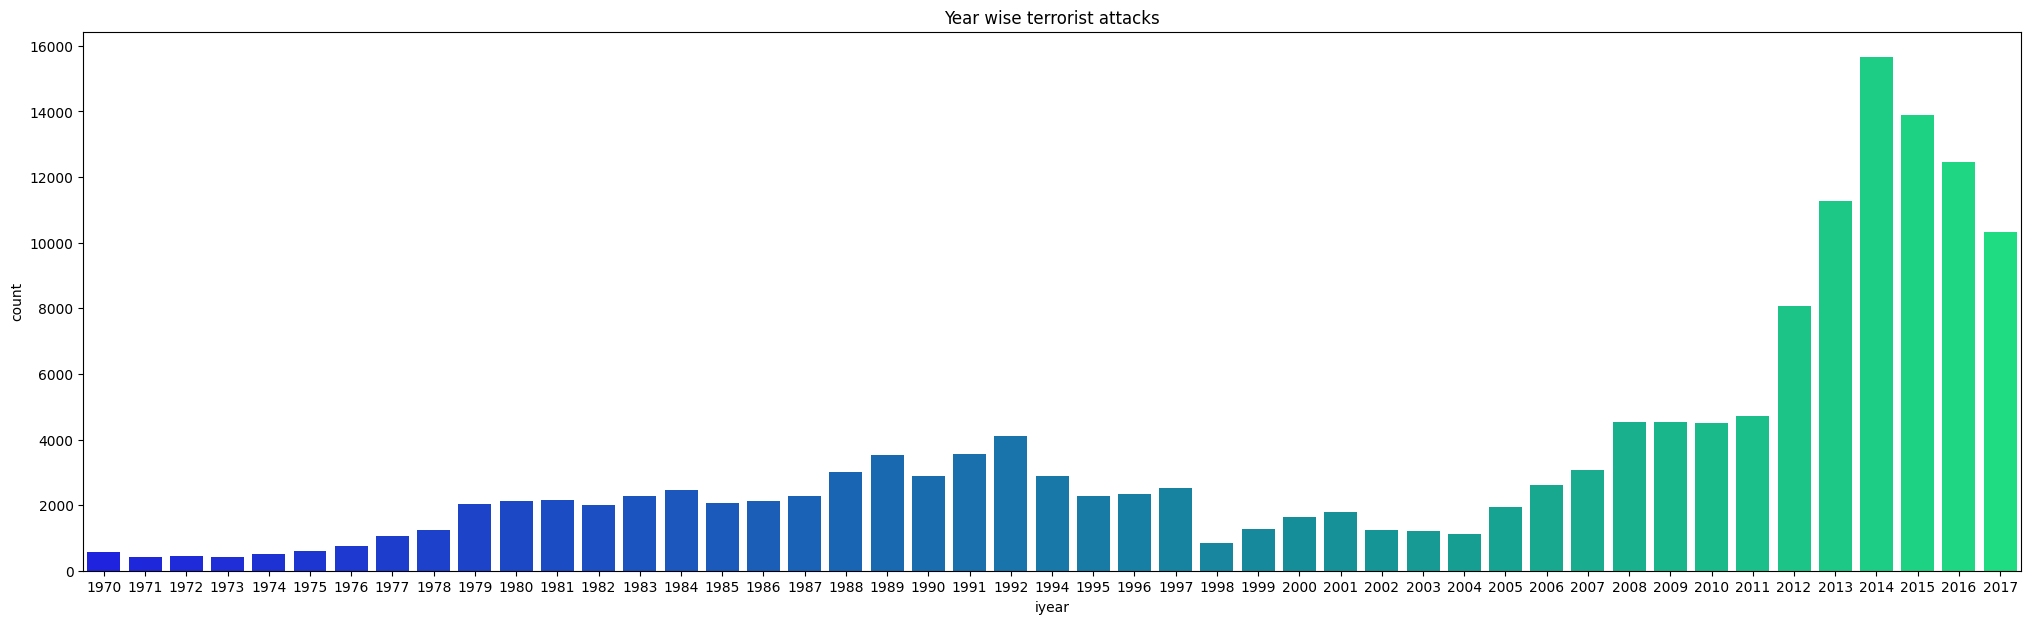

In [24]:
plt.figure(figsize=(25, 7))
sns.countplot(x=terror_data["iyear"], palette='winter')
plt.title('Year wise terrorist attacks')
plt.show()

**Insights:**
- It can be inferred from the plot that there has been a significant increase in terror attacks since the year 2012
- 2017 saw the highest number of terrorist attacks.
- The year that had the least amount of terrorist attacks was 1970.

#### `imonth` column

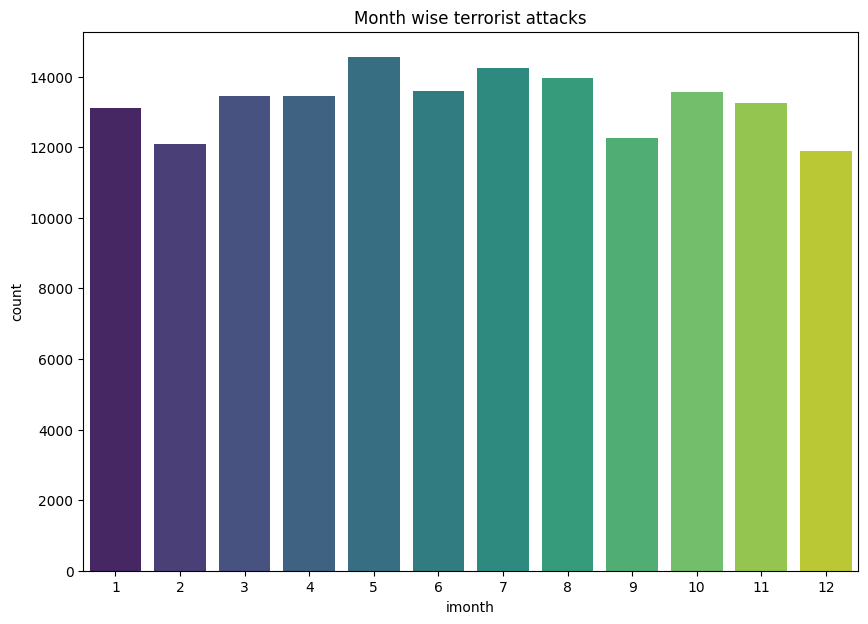

In [25]:
sns.countplot(x=terror_data["imonth"], palette="viridis")
plt.title("Month wise terrorist attacks")
plt.show()

**Insights:**
- There is no relationship between the month and the number of terrorist attacks

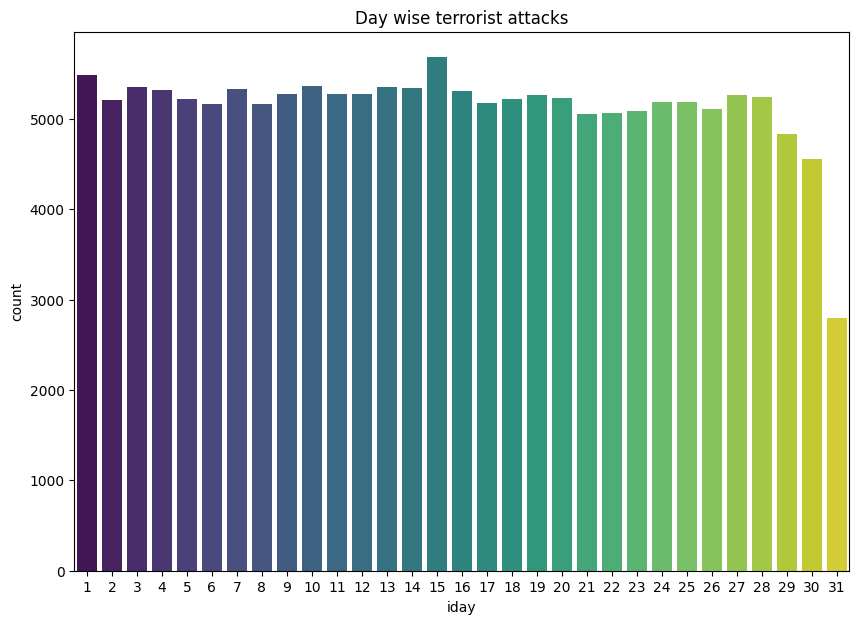

In [26]:
sns.countplot(x=terror_data["iday"], palette="viridis")
plt.title("Day wise terrorist attacks")
plt.show()

**Insights:**
- There is no relationship between day of the month and the attacks
- There are less attacks on 31st because all months doesn't have 31st.

#### `extended` column
The duration of the incident is shown in this column.
* 1 = "Yes" The duration of an incident extended more than 24 hours
* 0 = "No" The duration of an incident extended less than 24 hours.

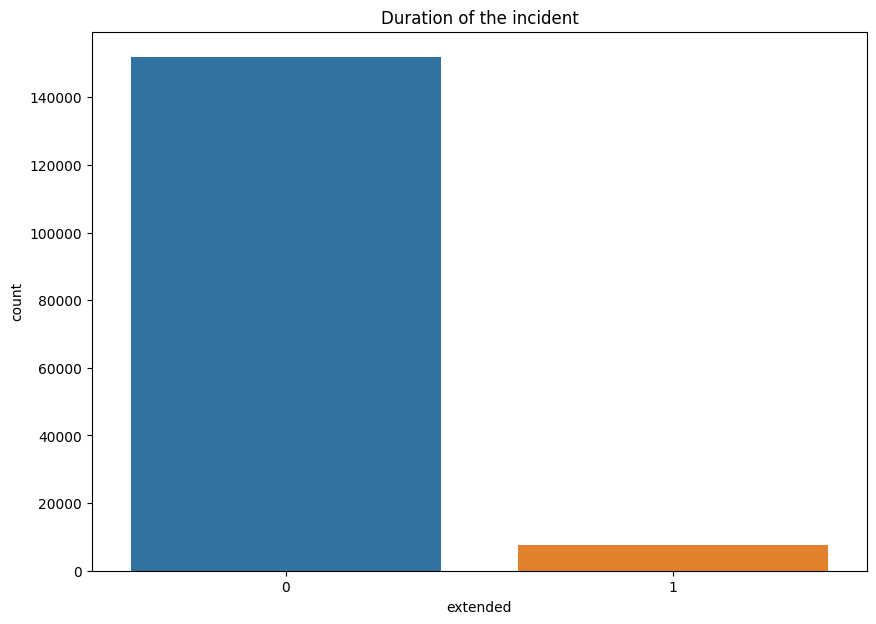

In [27]:
sns.countplot(data=terror_data, x="extended")
plt.title("Duration of the incident")
plt.show()

**Insights:**

The graphical representation reveals that the total number of recorded incidents surpasses 15,000, of which a notable portion, specifically those spanning less than 24 hours, constitutes a significant proportion. It is evident from the data that incidents characterized by shorter time durations significantly outnumber those incidents that are of prolonged duration.




#### `country_txt` column

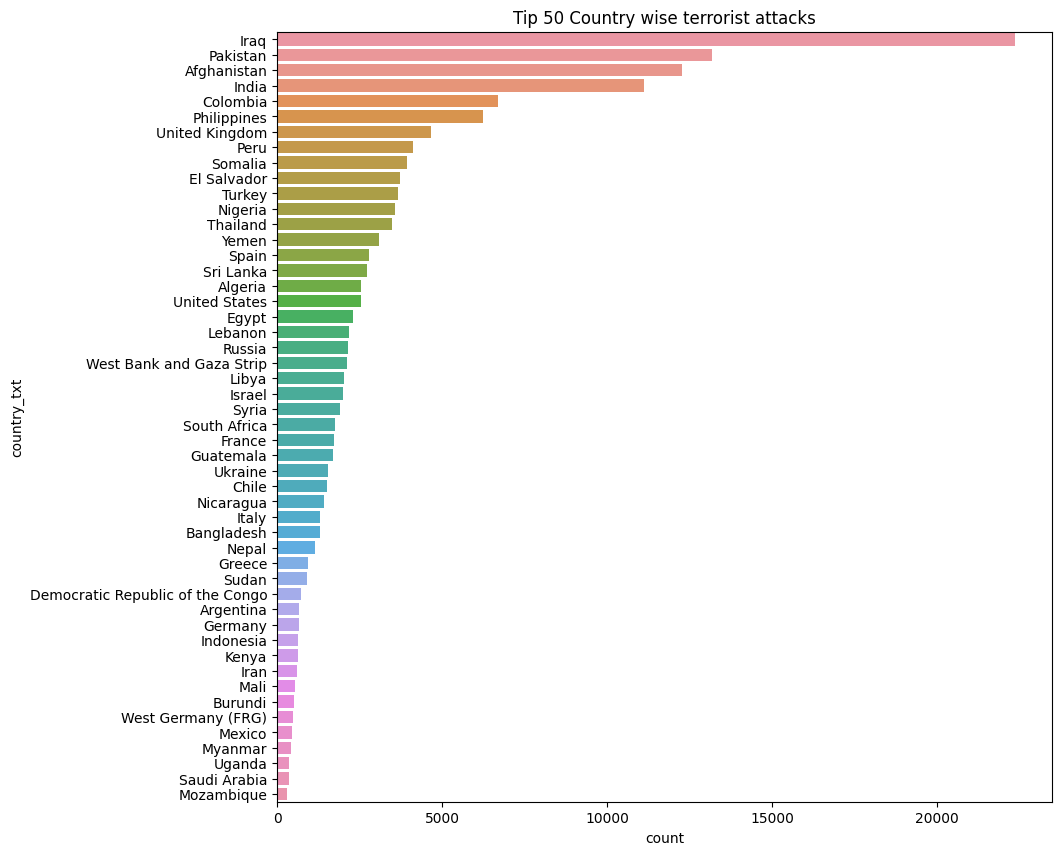

In [28]:
plt.figure(figsize=(10, 10))
sns.countplot(data=terror_data, y="country_txt", order=terror_data["country_txt"].value_counts().iloc[:50].index)
plt.title("Tip 50 Country wise terrorist attacks")
plt.show()

**Insights:**
- Iran, Pakistan, Afghanistan, and India are the countries that have been subjected to a significant number of terrorist attacks.
- Next, Coluumbia and Philippines are the most prone to terrorist attacks.

#### `region_txt` column

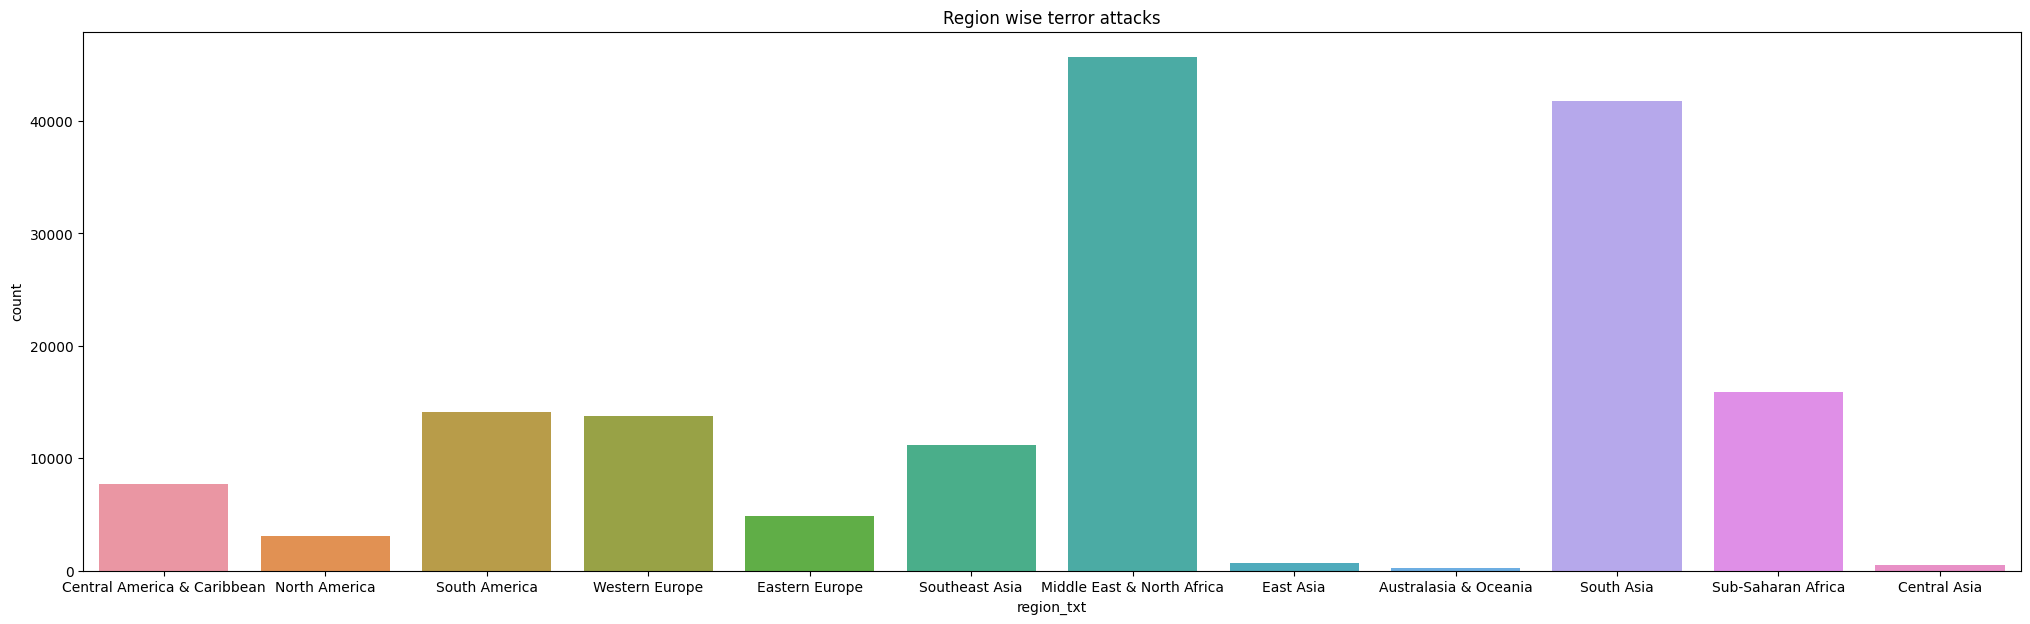

In [29]:
plt.figure(figsize=(25, 7))
sns.countplot(data=terror_data, x='region_txt')
plt.title("Region wise terror attacks")
plt.show()

**Insights:**
- Middle East & North Africa, and South Asia are prone to more terrorist attacks
- East Asia, Australia & Oceanica and Central Asia doesn't have that much terrorist problems.

#### `vicinity` column

- 1 = "Yes" The incident occurred in the immediate vicinity of the city in question.
- 0 = "No" The incident in the city itself.

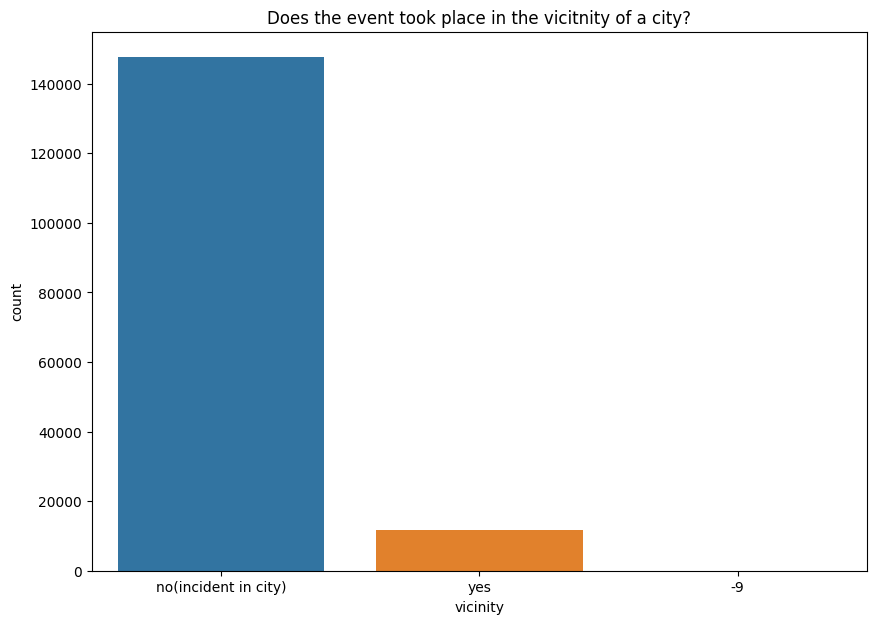

In [30]:
temp_df = terror_data["vicinity"].replace({1 : "yes", 0: "no(incident in city)"})
sns.countplot(x=temp_df)
plt.title("Does the event took place in the vicitnity of a city?")
plt.show()

**Insights:**
- Majority of the events occurred in the vicinity of the city rather than in the city.

#### `multiple` column

- 1 = "Yes" The attack is part of a multiple incident.
- 0 = "No" The attack is not part of a multiple incident.

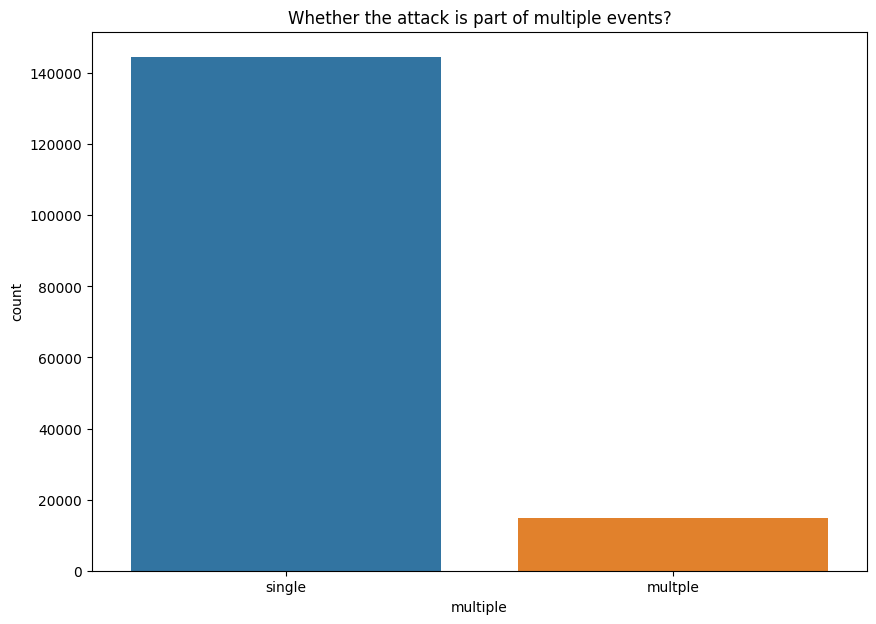

In [31]:
temp_df = terror_data["multiple"].replace({1 : "multple", 0: "single"})
sns.countplot(x=temp_df)
plt.title("Whether the attack is part of multiple events?")
plt.show()

**Insights:**
- There are more number of attacks which are not part of multiple attacks compared to the number of multiple attacks

#### `success` column
Success of a terrorist strike is defined according to the tangible effects of the attack. 
- 1 = "Yes" The incident was successful.
- 0 = "No" The incident was not successful.


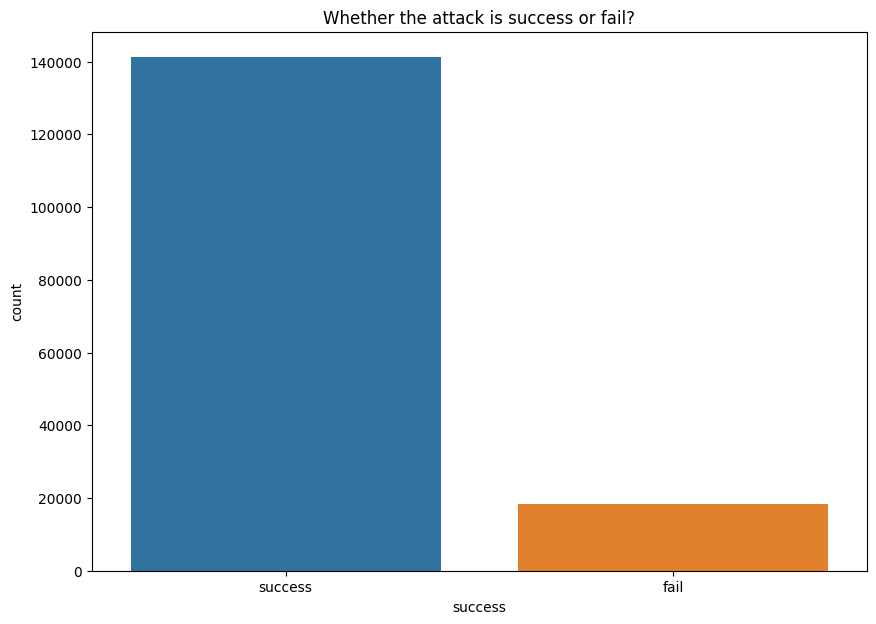

In [32]:
success_df = terror_data["success"].replace({1 : "success", 0: "fail"})
sns.countplot(x=success_df)
plt.title("Whether the attack is success or fail?")
plt.show()

Most number of attacks are successfull

#### `suicide` column
This variable is coded “Yes” in those cases where there is evidence that the perpetrator did not intend to escape from the attack alive. 
- 1 = "Yes" The incident was a suicide attack.
- 0 = "No" There is no indication that the incident was a suicide attack.

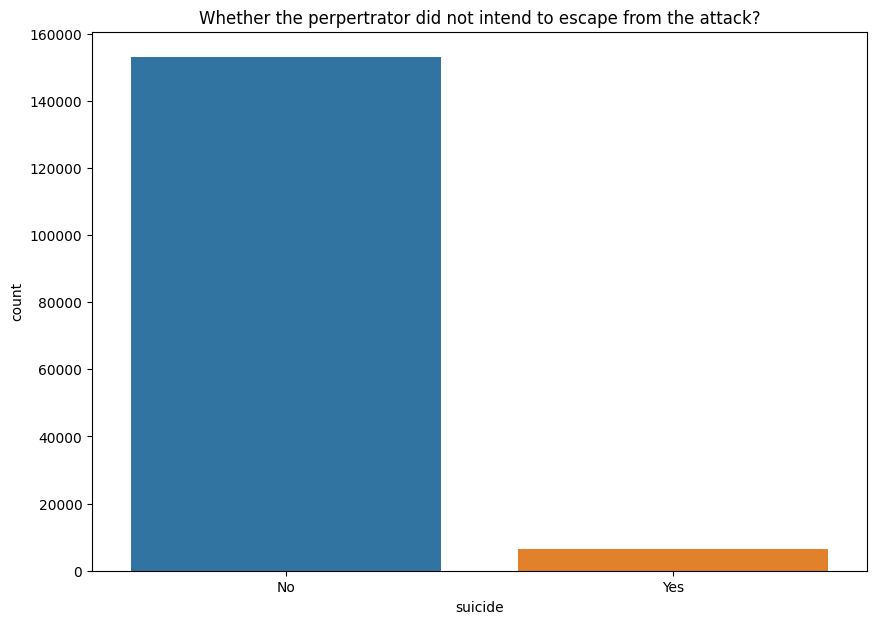

In [33]:
temp_df = terror_data["suicide"].replace({1 : "Yes", 0: "No"})
sns.countplot(x=temp_df)
plt.title("Whether the perpertrator did not intend to escape from the attack?")
plt.show()

In majority of the attacks, the perpertrator tried to escape the attack

#### `individual` column
Indicates whether the attack is planned by individual or group.

- 1 = "Yes" The perpetrator(s) were identified by name (or specific unnamed minors) and not known to be affiliated with a group or organization.
- 0 = "No" The perpetrator(s) were not identified as unaffiliated individuals (i.e. the perpetrators were either not identified by name, or were known to be affiliated with a group or organization).

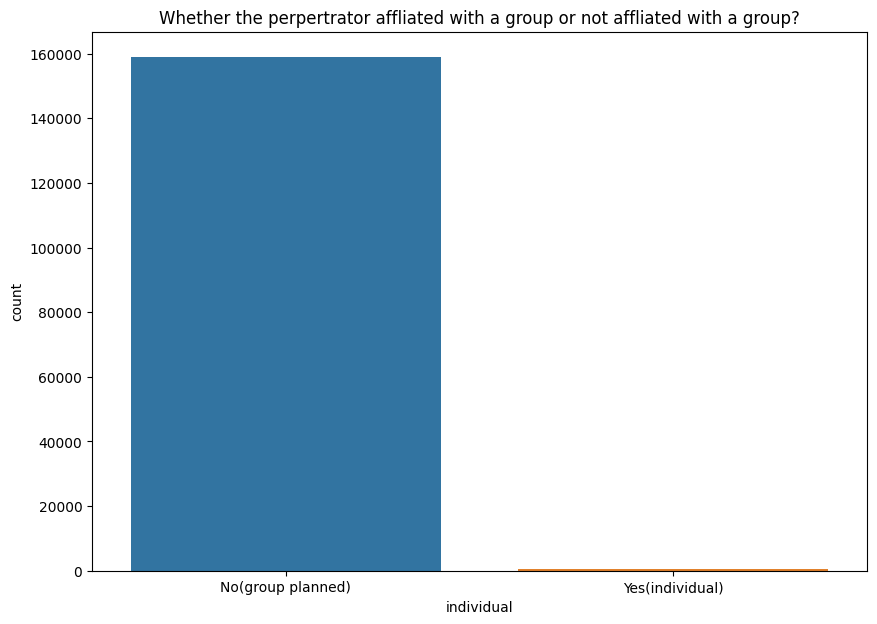

In [34]:
temp_df = terror_data["individual"].replace({1 : "Yes(individual)", 0: "No(group planned)"})
sns.countplot(x=temp_df)
plt.title("Whether the perpertrator affliated with a group or not affliated with a group?")
plt.show()

Majority of the attacks are planned by individuals who are not affliated to any group

#### `ishostkid` column
- 1 = "Yes" The victims were taken hostage or kidnapped.
- 0 = "No" The victims were not taken hostage or kidnapped. 
- -9 = "Unknown" It is unknown if the victims were taken hostage or kidnapped

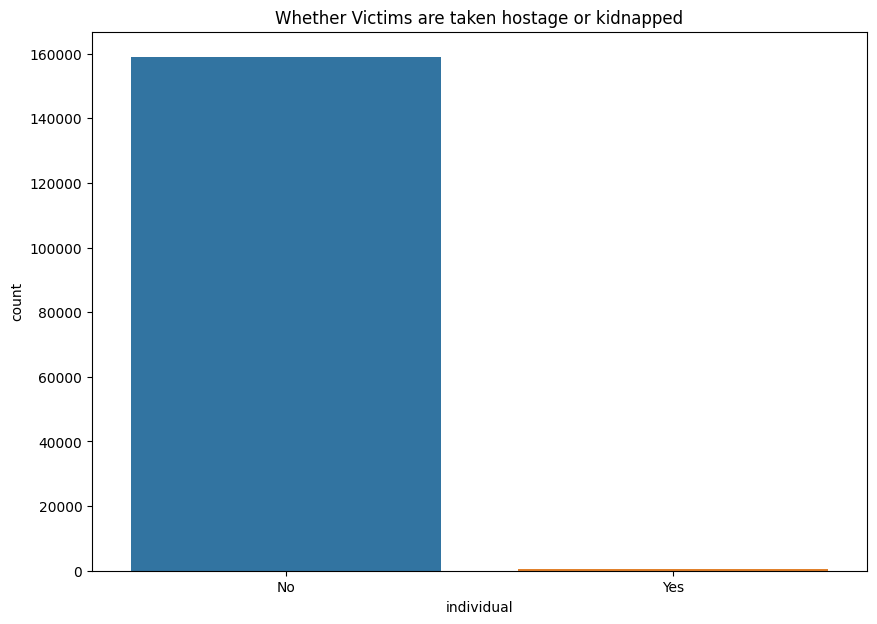

In [35]:
temp_df = terror_data["individual"].replace({1 : "Yes", 0: "No", -9: "Unknown"})
sns.countplot(x=temp_df)
plt.title("Whether Victims are taken hostage or kidnapped")
plt.show()

Almost all attacks doesn't have any hostage or kidnap  situation

#### `nkill` column
This field stores the number of confirmed fatalities in the incident

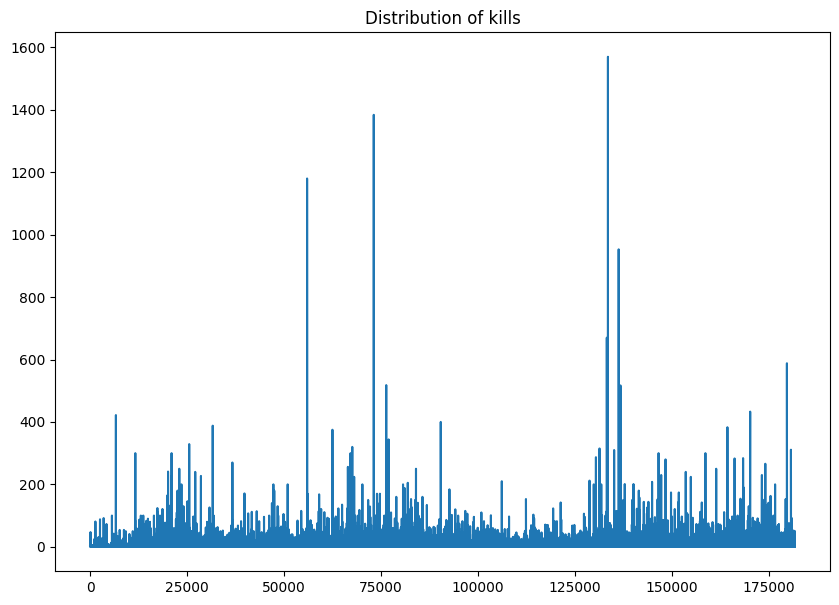

In [36]:
plt.plot(terror_data["nkill"])
plt.title("Distribution of kills")
plt.show()

#### `nwound` column

This field stores the number of wounded in the incident

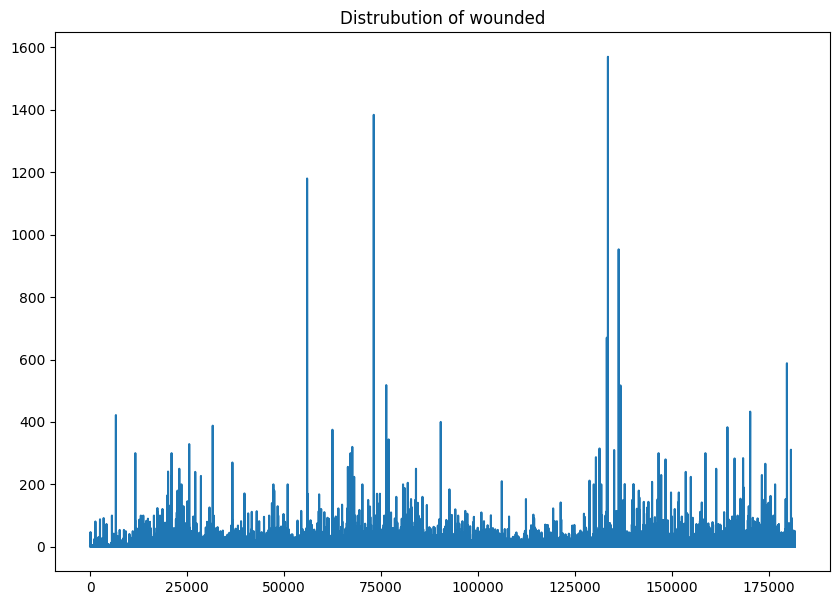

In [37]:
plt.plot(terror_data["nkill"])
plt.title("Distrubution of wounded")
plt.show()

### Bivariate Analysis

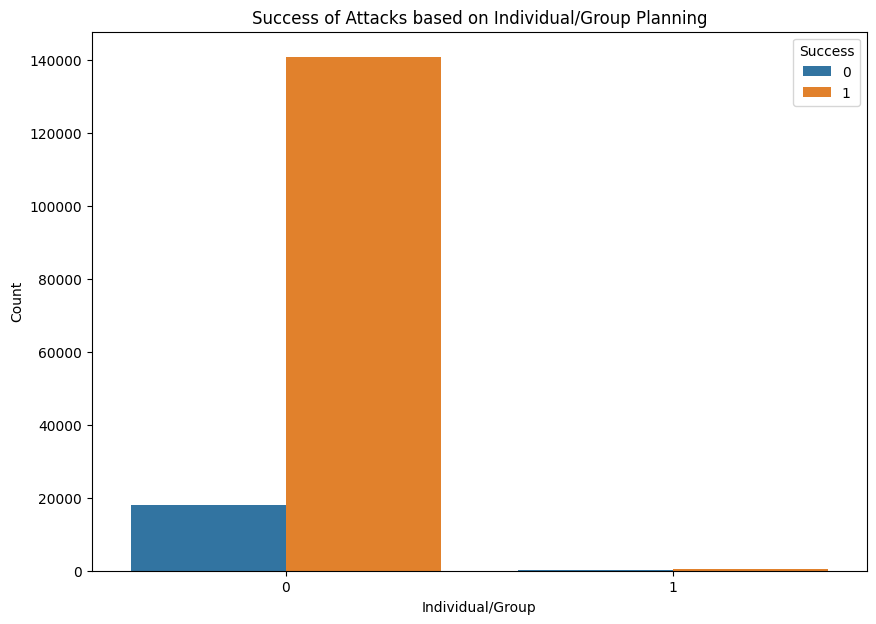

In [38]:
sns.countplot(data=terror_data, x='individual', hue='success')
plt.title('Success of Attacks based on Individual/Group Planning')
plt.xlabel('Individual/Group')
plt.ylabel('Count')
plt.legend(title='Success')
plt.show()

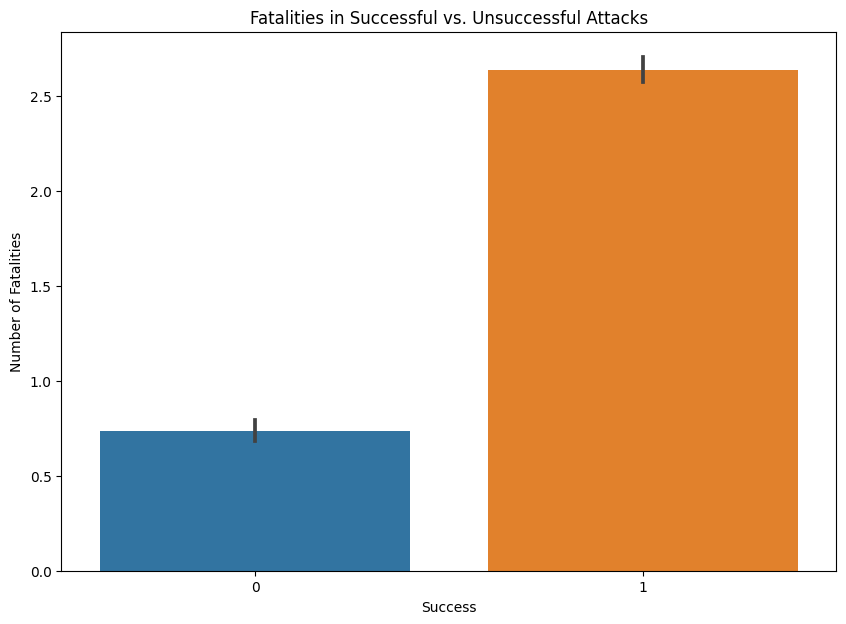

In [39]:
sns.barplot(data=terror_data, x='success', y='nkill')
plt.title('Fatalities in Successful vs. Unsuccessful Attacks')
plt.xlabel('Success')
plt.ylabel('Number of Fatalities')
plt.show()

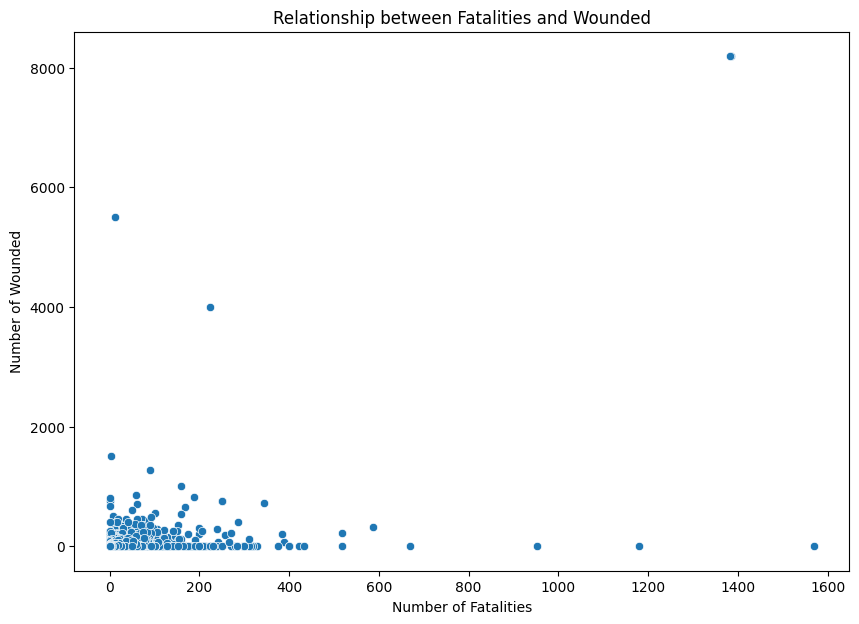

In [40]:
sns.scatterplot(data=terror_data, x='nkill', y='nwound')
plt.title('Relationship between Fatalities and Wounded')
plt.xlabel('Number of Fatalities')
plt.ylabel('Number of Wounded')
plt.show()


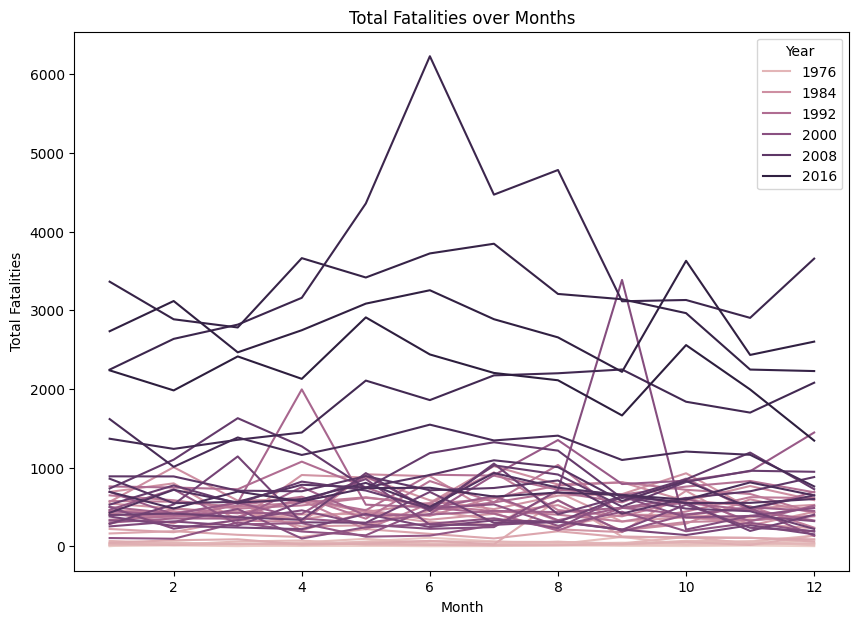

In [41]:
time_series = terror_data.groupby(['iyear', 'imonth'])[['nkill', 'nwound']].sum().reset_index()
sns.lineplot(data=time_series, x='imonth', y='nkill', hue='iyear')
plt.title('Total Fatalities over Months')
plt.xlabel('Month')
plt.ylabel('Total Fatalities')
plt.legend(title='Year')
plt.show()

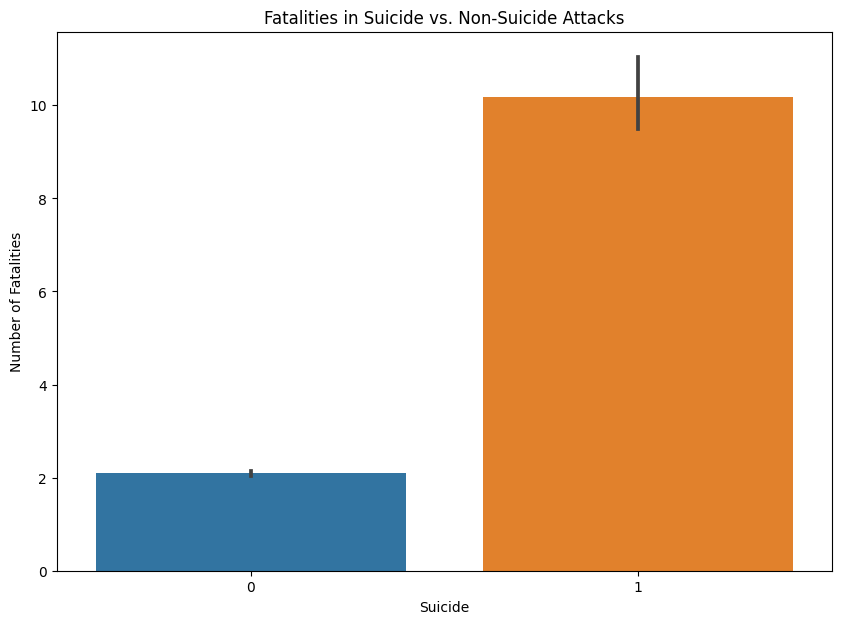

In [42]:
sns.barplot(data=terror_data, x='suicide', y='nkill')
plt.title('Fatalities in Suicide vs. Non-Suicide Attacks')
plt.xlabel('Suicide')
plt.ylabel('Number of Fatalities')
plt.show()

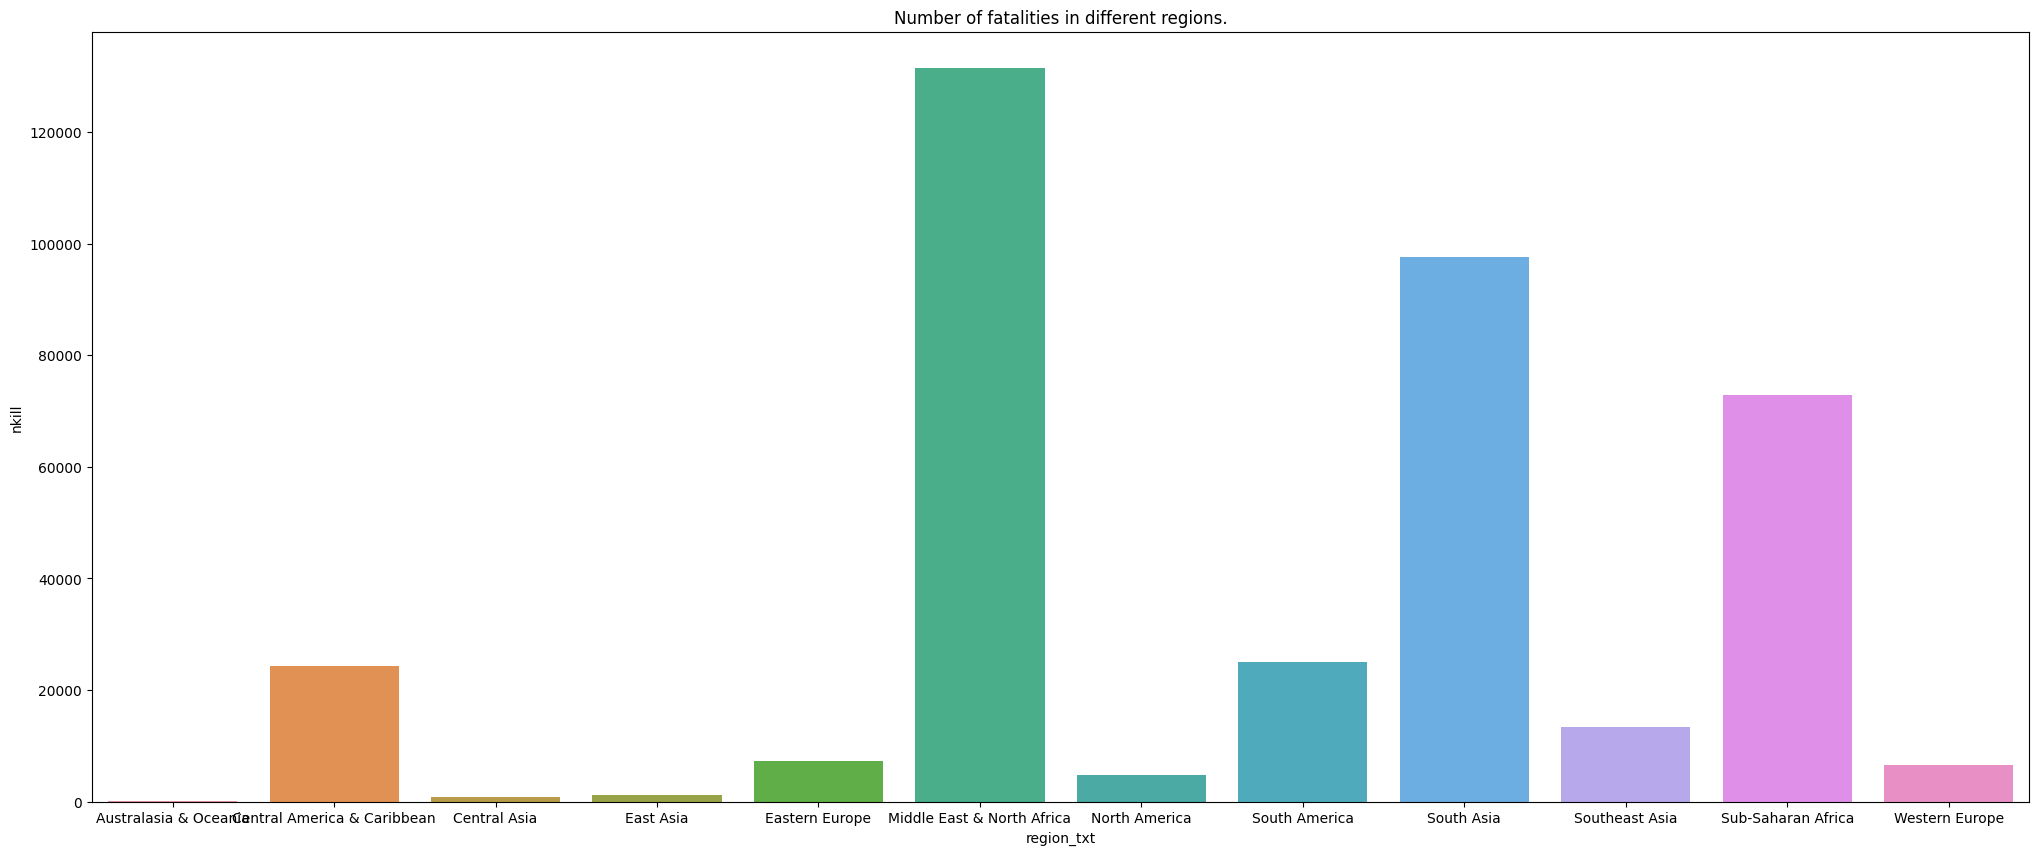

In [55]:
plt.figure(figsize=(25, 10))
kills_by_region = terror_data.groupby(["region_txt"])[["nkill", "nwound"]].sum()
sns.barplot(data=kills_by_region, x=kills_by_region.index, y="nkill")
plt.title("Number of fatalities in different regions.")
plt.show()

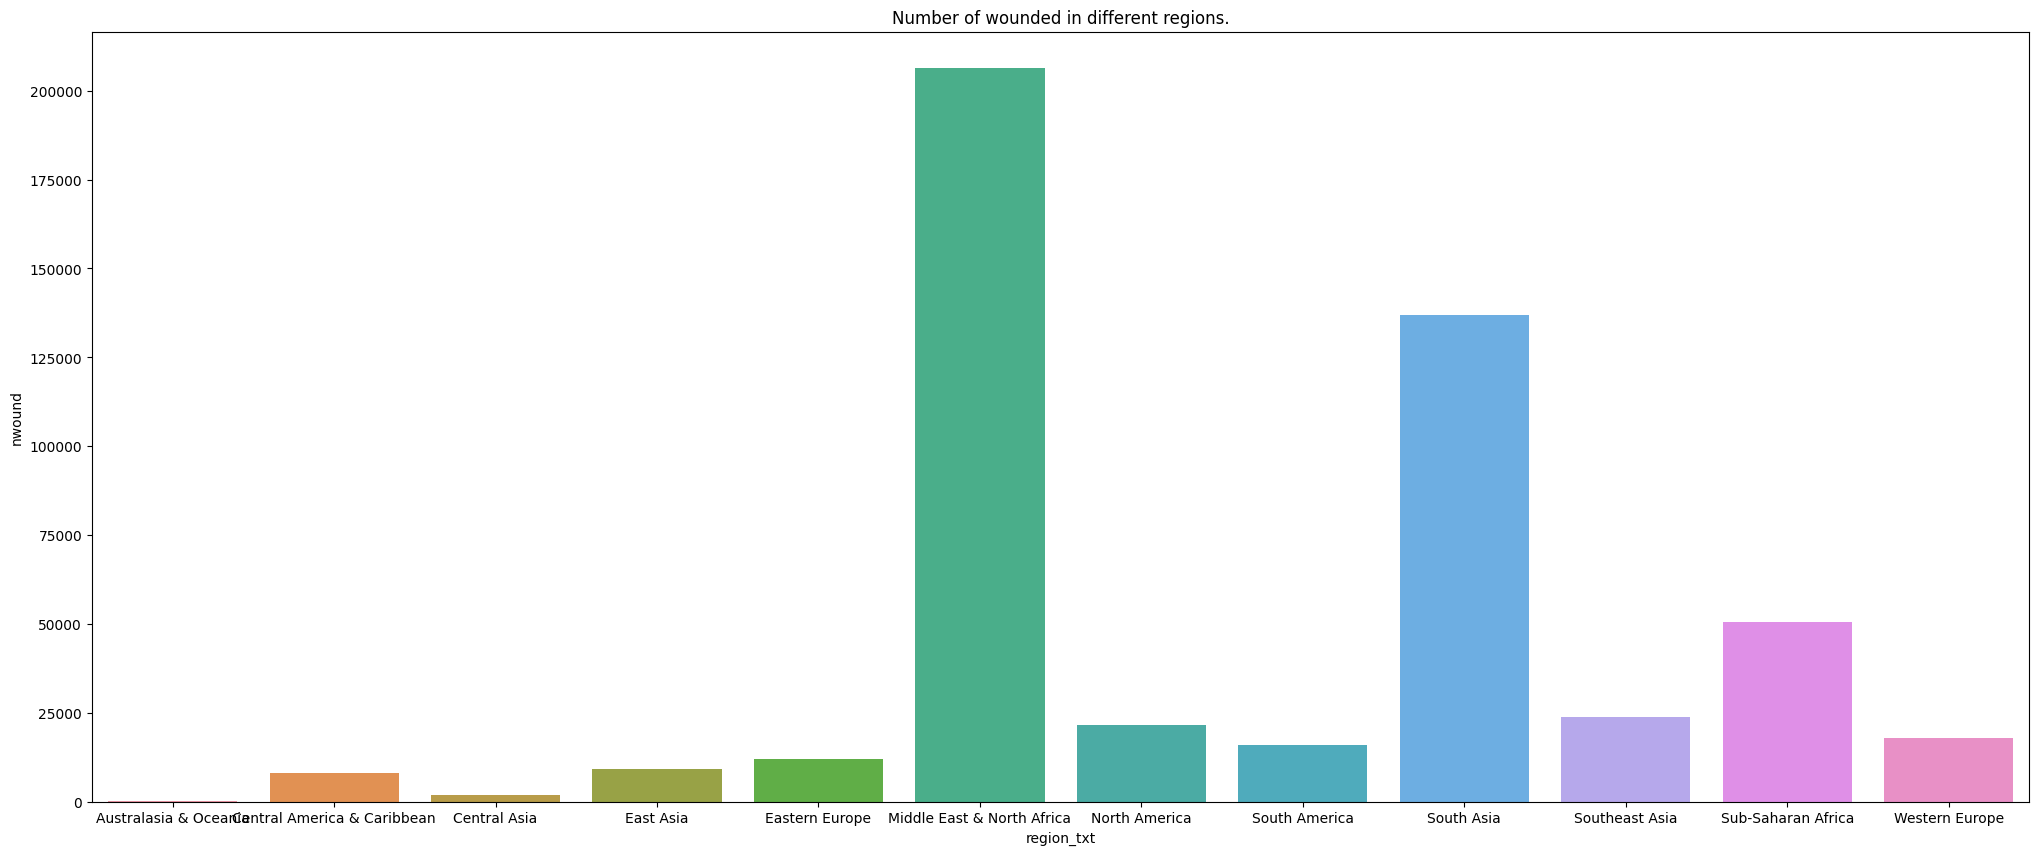

In [54]:
plt.figure(figsize=(25, 10))
sns.barplot(data=kills_by_region, x=kills_by_region.index, y="nwound")
plt.title("Number of wounded in different regions.")
plt.show()

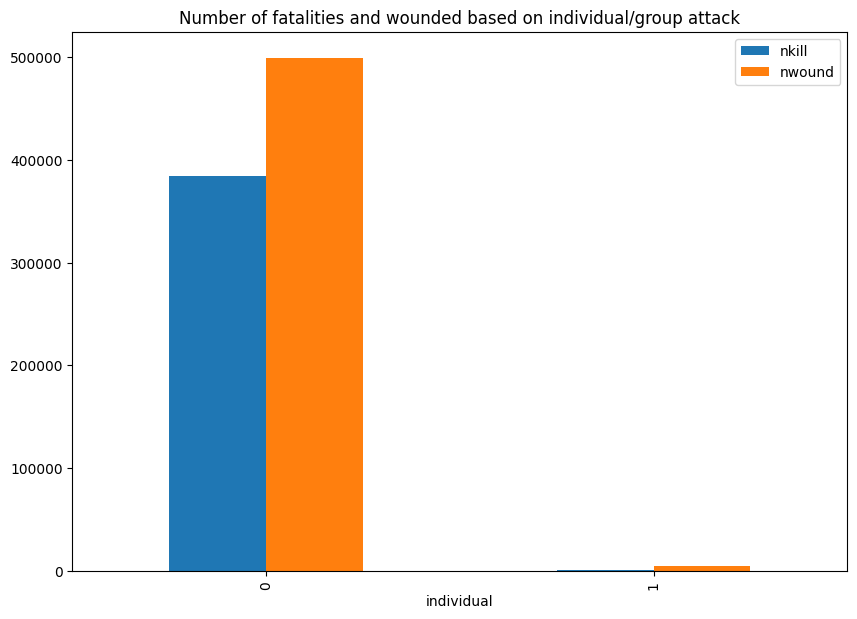

In [84]:
individual_df = terror_data.groupby(["individual"])[["nkill", "nwound"]].sum()
individual_df.plot(kind="bar")
plt.title("Number of fatalities and wounded based on individual/group attack")
plt.show()

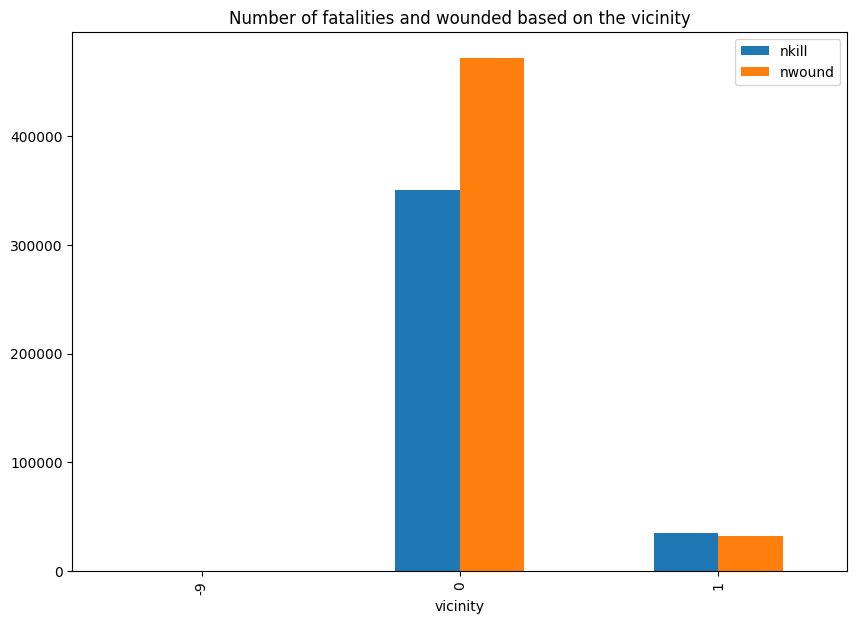

In [85]:
vicinity_df = terror_data.groupby(["vicinity"])[["nkill", "nwound"]].sum()
vicinity_df.plot(kind="bar")
plt.title("Number of fatalities and wounded based on the vicinity")
plt.show()

From the above graph, we can infer that there are more fatalities and wounded where the attack occured in the city.

## Generate Pandas profile report

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(terror_data)
profile.to_file('../pandas_profile.html')